## Load Data

In [227]:
import numpy as np

#td idf
jokowi_tfidf = np.load("PCA_result_jokowi.npy")
ahok_tfidf = np.load("PCA_result_ahok.npy")
anies_tfidf = np.load("PCA_result_anies.npy")

#td idf2
jokowi_mpnet = np.load("embed_MPNet_jokowi.npy")
ahok_mpnet = np.load("embed_MPNet_ahok.npy")
anies_mpnet = np.load("embed_MPNet_anies.npy")

#bert
jokowi_bert = np.load("Jokowi_embed.npy")
ahok_bert = np.load("Ahok_embed.npy")
anies_bert = np.load("Anies_embed.npy")

### Spectral

In [241]:
from sklearn.cluster import SpectralClustering

# Melakukan Spectral Clustering
n_clusters = 36  # Jumlah kelompok yang diinginkan
model = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
clusters = model.fit_predict(jokowi_mpnet)

In [242]:
from sklearn.metrics import silhouette_score

# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(jokowi_mpnet, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.026169996708631516


In [243]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(jokowi_mpnet,clusters)

23.425807811015584

In [244]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(jokowi_mpnet,clusters)

2.7142864078869007

In [232]:
#output
np.save("label_jokowi.npy", model.labels_)

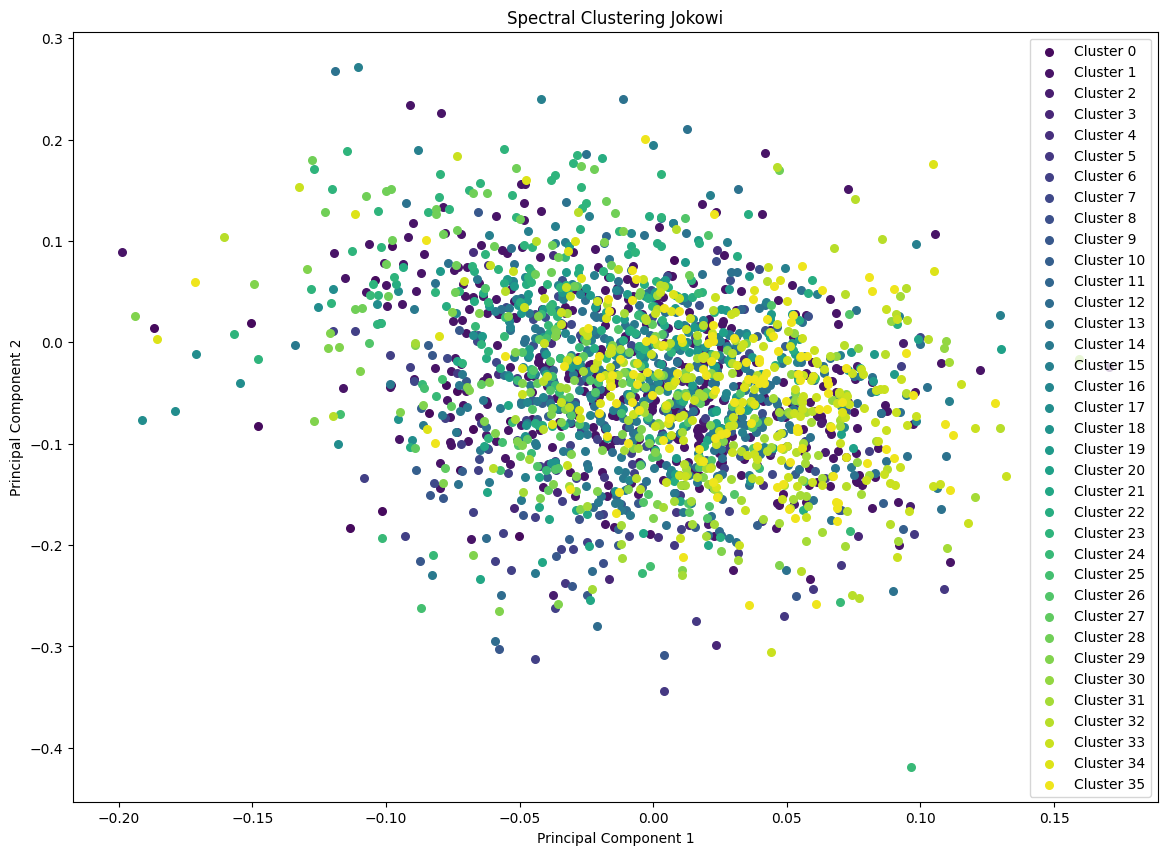

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi hasil clustering
plt.figure(figsize=(14, 10))

# Ubah warna setiap cluster
colors = sns.color_palette('viridis', n_clusters)

# Plot data dengan warna berdasarkan cluster
for cluster in range(n_clusters):
    cluster_data = jokowi_mpnet[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', color=colors[cluster], s=30)

plt.title('Spectral Clustering Jokowi')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### MiniBatchK-Means


In [233]:
# MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans
n_clusters = 30
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(ahok_mpnet)

# Menyematkan label kluster ke setiap dokumen
labels = kmeans.predict(ahok_mpnet)

c:\Users\lovi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [234]:
from sklearn.metrics import silhouette_score

# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(ahok_mpnet, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.02835891582071781


In [235]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(ahok_mpnet,labels)

29.998927691399896

In [236]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(ahok_mpnet,labels)

3.2755066018035652

### BIRCH

In [237]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=36, threshold=0.5, branching_factor=50)
birch.fit(anies_mpnet)
labels = birch.predict(anies_mpnet)

In [238]:
from sklearn.metrics import silhouette_score

# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(anies_mpnet, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.032090649008750916


In [239]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(anies_mpnet,labels)

3.1652823813743294